In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# See basic information
we found there are 5 missing-value parameters.
['Age', 'Ticket', 'Fare', 'Cabin', 'Embarked']

* Age null ratio is 3.29
* Ticket null ratio is 4.62
* Fare null ratio is 0.13
* Cabin null ratio is 67.87
* Embarked null ratio is 0.25


In [89]:
ds_train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
ds_test = pd.read_csv('../input/tabular-playground-series-apr-2021/test.csv')

PassengerId = ds_test.PassengerId
Survived = ds_train.Survived

dataset = pd.concat([ds_train, ds_test])
dataset = dataset.drop(['PassengerId'], axis=1)

print(ds_train.info())
print(ds_test.info())

for col in ds_train:
    unique = ds_train[col].value_counts().count()
    print(f'{col} unique: {unique}')
print('*****************************')
    
num_rows = len(ds_train.index)
for col in ds_train:
    col_null = ds_train[col].isnull().sum() 
    if col_null != 0:
        print(f'{col} null ratio is {(col_null/num_rows)*100}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 

# Data Visualization

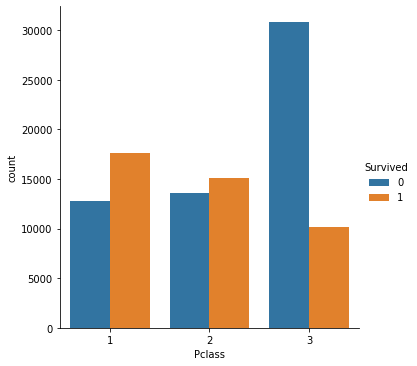

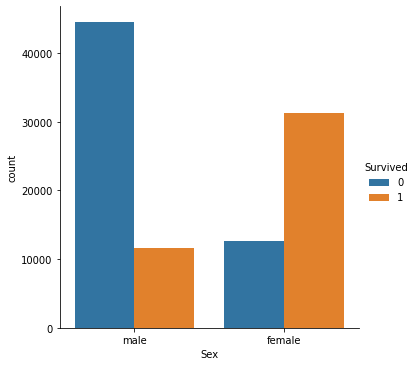

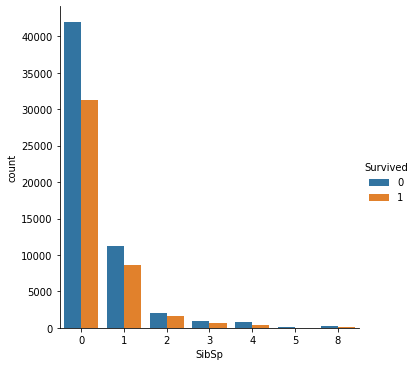

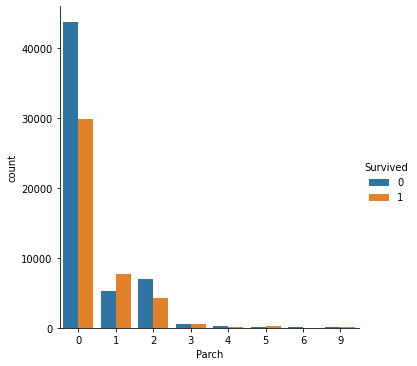

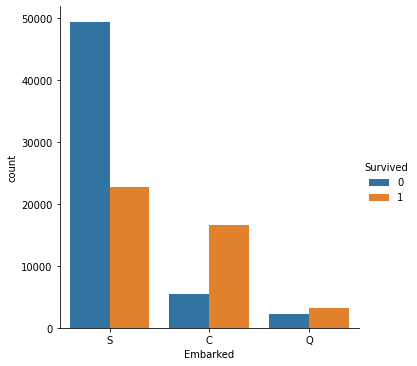

In [90]:
for i, col in enumerate(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']):
    sns.catplot(x=col, hue='Survived', data=ds_train, kind='count')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


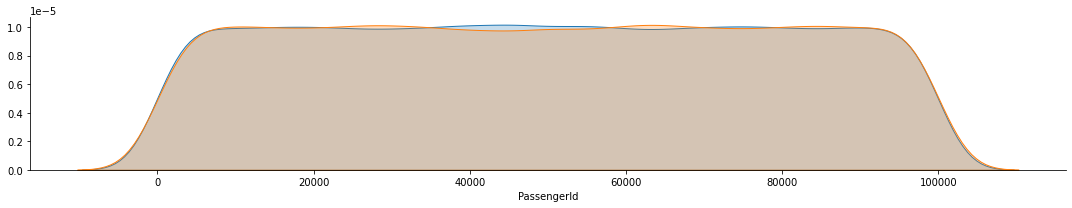

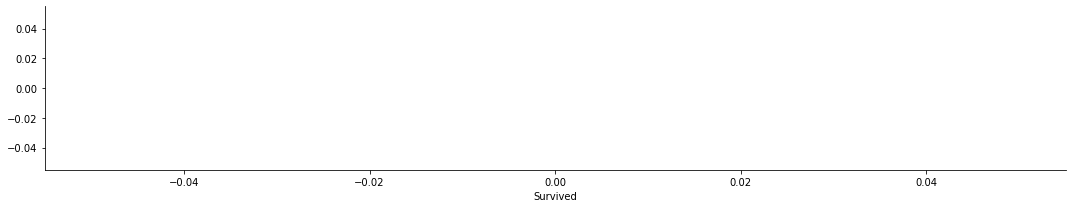

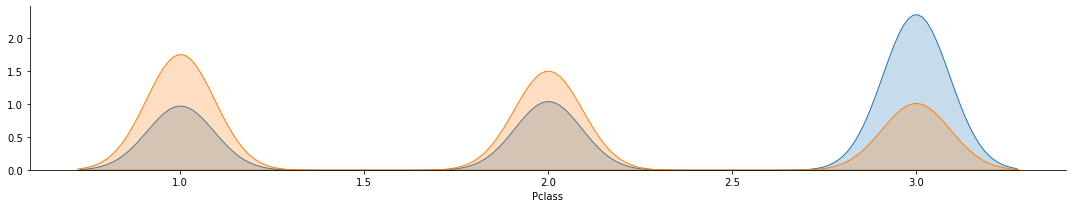

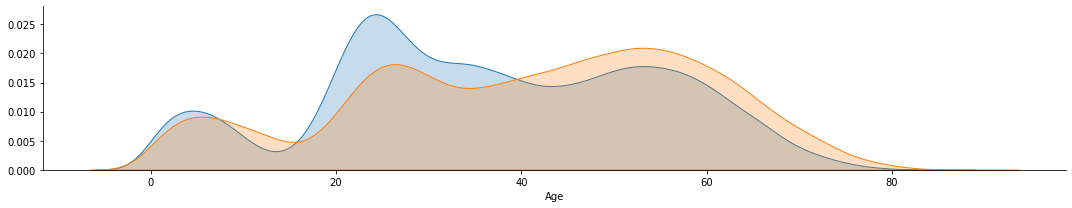

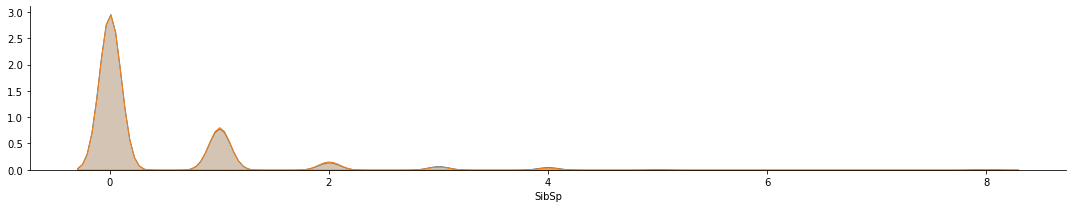

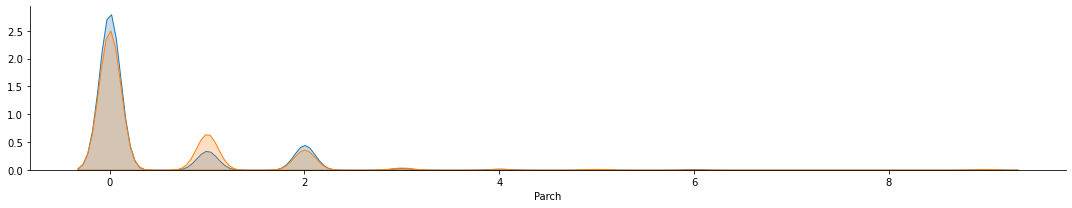

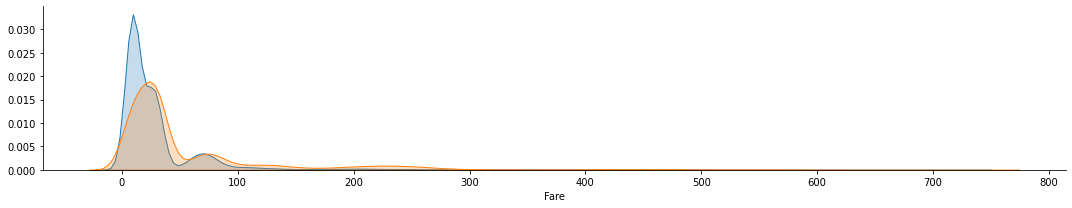

In [91]:
for i, col in enumerate(ds_train.columns):
    if ds_train[col].dtype != 'object':
        as_fig = sns.FacetGrid(data=ds_train, hue='Survived', aspect=5)
        as_fig.map(sns.kdeplot, col, shade=True)

# Data explanatory

In [92]:
## Name

Names = ds_train['Name'].values
first_name = []
last_name =[]
for name in Names:
    my_name = name.split(',')
    first_name.append(my_name[0].strip())
    last_name.append(my_name[1].strip())

print(len(dict.fromkeys(first_name).keys()))
print(len(dict.fromkeys(last_name).keys()))

honorific = []
# Does Name columns include honorific title?
for name in Names:
    if any(x in name for x in ['Mr', 'Ms', 'Miss', 'Dr']):
        honorific.append(name)

## Name doesn't have a honorific information.
## drop from dataset

21558
3953


<BarContainer object of 20 artists>

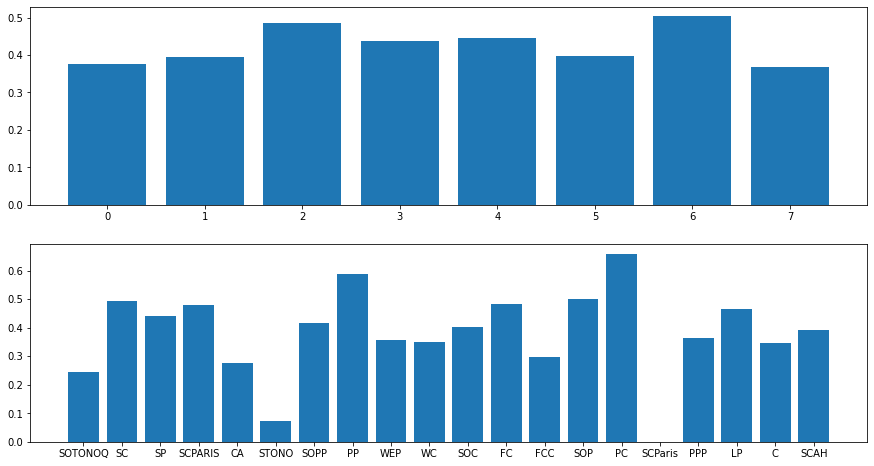

In [131]:
## Ticket
import re

# In general, ticket = xxx operation passes pointer to the value.
# Use copy to 
ticket = ds_train.Ticket.values.copy()
cat_ticket = []
for i, val in enumerate(ticket):
    if isinstance(val, str):
        try:
            ticket[i] = int(re.search('[0-9]+', val).group())
        except:
            val = val.replace('.', '').replace('/','').replace(' ', '')
            ticket[i] = np.nan
            cat_ticket.append(val)
ds_train['Ticket_val'] = pd.to_numeric(pd.Series(ticket))
cat_ticket = list(dict.fromkeys(cat_ticket))


fig, axes = plt.subplots(2,1, figsize=(15, 8))

# Is ticket numerical value has a large effect on the result?
xcol = np.arange(0,10)
y = []
for i, x in enumerate(xcol):
        in_range_ds = ds_train[((i*10000) < ds_train['Ticket_val']) & (ds_train['Ticket_val'] <= ((i+1)*10000))]
        y.append(in_range_ds['Survived'].mean())
axes[0].bar(xcol,y)

# Is ticket STR has a large effect on the result?
ticket_val = ds_train[['Ticket', 'Survived']].copy()
ticket_val['Ticket'] = ticket_val['Ticket'].apply(lambda x: re.sub('[0-9]+', '', str(x).replace('.', '').replace('/', '').upper()).replace(' ', ''))

y = []
for cat in cat_ticket:
    target = ticket_val[ticket_val['Ticket'].apply(lambda x: True if x == cat else False)]
    y.append(target['Survived'].mean())
axes[1].bar(cat_ticket, y)

## Alphabetic has a large effect on the result!!

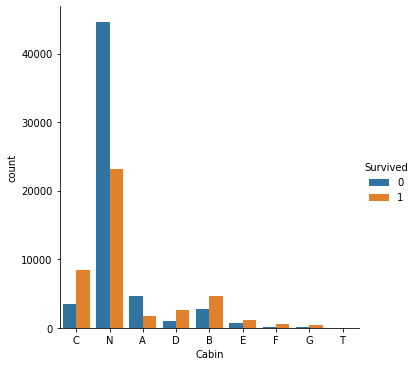

In [94]:
## Cabin
cabin = ds_train.loc[:, ['Cabin', 'Survived']].copy()
cabin['Cabin'] = cabin['Cabin'].fillna('N')
cabin['Cabin'] = cabin['Cabin'].map(lambda x: x[0])

sns.catplot(x='Cabin', hue='Survived', data=cabin, kind='count')

## Cabin type has a large effect to a result of life!!

## Stragegy ##
# 1. fillna with 'N'
# 2. replace cabin value with head of cabin name

# Feature Engineering

In [95]:
#dataset['Family'] = dataset['SibSp'] + dataset['Parch']
#    dataset.loc[dataset['Family'] == 0, 'Alone'] = 1
#    dataset['Alone'] = dataset['Alone'].fillna(value=0)